In [23]:
from dataclasses import dataclass

@dataclass
class DataPoint:
    x: float
    y: float
    z: float
    r: float
    n: int

    @classmethod
    def parse_line(cls, line):
      x, y, z, r, n = line.split()
      return cls(float(x), float(y), float(z), float(r), int(n))
    
    def get_xy(self):
      return self.x, self.y

@dataclass
class DataStep:
    n: int
    data: list[DataPoint]

with open('big_sim_hills_sliding_brick_1000_disable_pq=false_ring_type=A.csv') as f:
  data = [DataPoint.parse_line(line) for line in f.read().split('\n') if line.strip()]

steps = [DataStep(0, [])]
current_step = 0
for d in data:
  if d.n != current_step:
    steps.append(DataStep(current_step, []))
    current_step = d.n
  steps[-1].data.append(d)


print(len(steps), len(steps[-1].data))


81 1000


In [24]:
steps[-1].data[94]

DataPoint(x=-2.073588012179949e-07, y=1.1676393769362697e-05, z=-1.0654619223983117e-08, r=1e-07, n=80)

In [47]:
%matplotlib inline


In [49]:

%matplotlib widget
#widget

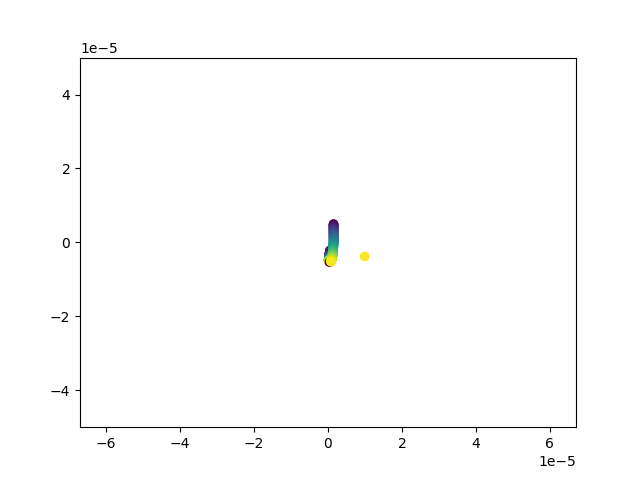

In [50]:
import matplotlib.pyplot as plt


def show_particle(idx, special_idx=[]):
  tmp = [s.data[idx].get_xy() for s in steps]
  
  colors = [0 if e in special_idx else e for e in range(len(tmp))]
  plot = plt.scatter(*zip(*tmp), c=colors)
  plot.axes.set_aspect('equal', 'datalim')



# show_particle(94)
# show_particle(283)
# show_particle(42)

show_particle(34, [78,79])
show_particle(210, [78,79])
show_particle(649)


plt.xlim(-5e-5, 5e-5)
plt.ylim(-5e-5, 5e-5)
plt.show()
